# Recommendation Cosine Similarity

Cosine Similarity is a widespread method that has been applied in recommendation for many years. It can be used not only for customers' product preferences but also for the NLP field. All the difference is what kinds of data you need to feed to the model. 

### Data

Due to the absence of real data, we will create a fake customer x product table.  
Assume we have a table with 10000 customers(rows) and 100 products(columns). (The values are between 1 to 5)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

data = np.random.randint(1, 5, [10000, 100])

print(data.shape)

data

(10000, 100)


array([[4, 4, 2, ..., 1, 2, 2],
       [2, 2, 3, ..., 2, 2, 4],
       [3, 1, 4, ..., 1, 1, 1],
       ...,
       [4, 1, 2, ..., 3, 1, 1],
       [1, 3, 4, ..., 4, 3, 1],
       [3, 2, 3, ..., 2, 2, 4]])

### Normalization

Most of the time, the data in the real world is not in the range between 1 and 5, so you can do the normalization to scale them to a specific range.

In [2]:
from sklearn.preprocessing import MinMaxScaler

def data_normalization(data:pd.DataFrame) -> pd.DataFrame:
    """
    Normailze data
    """
    normalization_data = pd.DataFrame()
    for i in data.columns:
        max_min = MinMaxScaler()
        max_min.fit(data[[i]])
        normalization_data[i] = max_min.transform(data[[i]])
    return normalization_data

## Cosine Similarity

$$
Cosine Similarity = ||A|| ||B||cos(θ) = \frac{AB}{||A|| ||B||} = \frac{\sum_{i=1}^n{A_i}{B_i}}{\sqrt{\sum_{i=1}^{n}{A_i^2}}\sqrt{\sum_{i=1}^{n}{B_i^2}}}
$$

It is very convenient to implement cosine similarity. You just need to import `cosine_similarity` from sklearn.  
Or you can build on your own, I have no opinion.

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

### Customer Similarity

The `customer_similarity` table is a 10000 x 10000 table, the diagonal is the customers on their own. 

In [4]:
customer_similarity = cosine_similarity(data)

print(customer_similarity.shape)

customer_similarity

(10000, 10000)


array([[1.        , 0.85659116, 0.83793666, ..., 0.82434663, 0.85330873,
        0.85645239],
       [0.85659116, 1.        , 0.82474958, ..., 0.84081146, 0.82014918,
        0.8840251 ],
       [0.83793666, 0.82474958, 1.        , ..., 0.85109748, 0.81246224,
        0.83523121],
       ...,
       [0.82434663, 0.84081146, 0.85109748, ..., 1.        , 0.82777456,
        0.81520601],
       [0.85330873, 0.82014918, 0.81246224, ..., 0.82777456, 1.        ,
        0.80729124],
       [0.85645239, 0.8840251 , 0.83523121, ..., 0.81520601, 0.80729124,
        1.        ]])

Let take a look of the top 100 records

<Axes: >

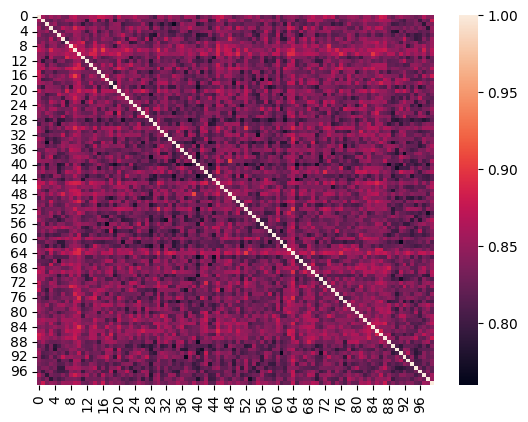

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(customer_similarity[:100, :100])

### Product Similarity

The `customer_similarity` table is a 100 x 100 table, the diagonal is the proudcts on their own. 

In [6]:
product_similarity = cosine_similarity(data.T)

print(product_similarity.shape)

product_similarity

(100, 100)


array([[1.        , 0.83492423, 0.83312098, ..., 0.83373151, 0.83590515,
        0.83662223],
       [0.83492423, 1.        , 0.83405958, ..., 0.83282728, 0.83451989,
        0.83221374],
       [0.83312098, 0.83405958, 1.        , ..., 0.83952783, 0.83598928,
        0.83425226],
       ...,
       [0.83373151, 0.83282728, 0.83952783, ..., 1.        , 0.83417216,
        0.83467077],
       [0.83590515, 0.83451989, 0.83598928, ..., 0.83417216, 1.        ,
        0.8351792 ],
       [0.83662223, 0.83221374, 0.83425226, ..., 0.83467077, 0.8351792 ,
        1.        ]])

<Axes: >

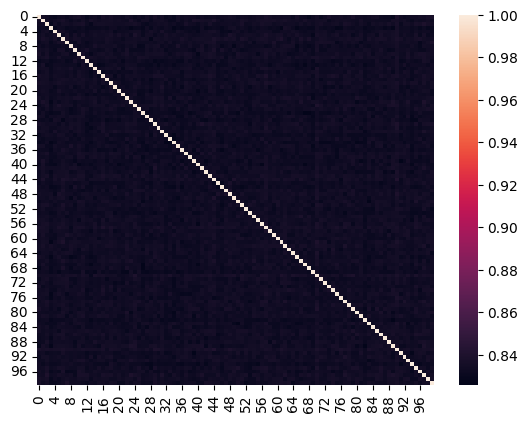

In [7]:
sns.heatmap(product_similarity[:100, :100])

### Get the most similar

`np.argpartition` is really, really a useful function to get the top N similar records. I wrapped it as a `top_n` function.

In [8]:
def top_n(data, N):
    """
    Get the top N records by row.
    """
    return np.argpartition(data, range(-N, 0))[:, -N:]

The most right side column is the most similar record (the record itself).

In [9]:
top_n(customer_similarity, 5)[:10]

array([[5034, 8076, 7133, 4786,    0],
       [1394, 4012, 6883, 7508,    1],
       [5257, 3084, 3252, 6574,    2],
       [ 562, 7999, 7476, 1112,    3],
       [8885, 3712, 4018,  406,    4],
       [4606, 5369, 1700,  673,    5],
       [5059, 8159, 2803, 2600,    6],
       [7666, 6222, 5481,  349,    7],
       [5313, 2882, 1626, 9969,    8],
       [6579, 1182, 4443, 3546,    9]], dtype=int64)

Remove itself to get the real top N records.

In [10]:
def top_n(data, N, exclude=True):
    """
    Get the top N records by row. (exclude itself)
    """
    if exclude == True:
        return np.argpartition(data, range(-N, 0))[:, -N-1:-1]
    else:
        return np.argpartition(data, range(-N, 0))[:, -N:]

In [11]:
top_n(customer_similarity, 5)[:10]

array([[3317, 5034, 8076, 7133, 4786],
       [5286, 1394, 4012, 6883, 7508],
       [6537, 5257, 3084, 3252, 6574],
       [6049,  562, 7999, 7476, 1112],
       [1177, 8885, 3712, 4018,  406],
       [8625, 4606, 5369, 1700,  673],
       [5163, 5059, 8159, 2803, 2600],
       [3492, 7666, 6222, 5481,  349],
       [2951, 5313, 2882, 1626, 9969],
       [5597, 6579, 1182, 4443, 3546]], dtype=int64)

We can know that the No.4786 customer is the most similar customer with the No.0 customer 

## Sparse Data

Most of the data in the world is sparse. It is almost impossible that a customer has ever bought all the products, or a product has been bought by all customers.  

Let's create a table which has the same dimension as the previous one but with 60% nan.

In [12]:
data = np.random.choice([1.0, 2.0, 3.0, 4.0, 5.0], [10000, 100])

print(data.shape)

data

(10000, 100)


array([[4., 4., 1., ..., 3., 1., 2.],
       [5., 3., 2., ..., 5., 3., 2.],
       [4., 1., 2., ..., 1., 2., 1.],
       ...,
       [2., 1., 4., ..., 2., 2., 3.],
       [3., 1., 2., ..., 5., 1., 3.],
       [4., 2., 2., ..., 5., 3., 5.]])

Create a mask to replace the positions of nan

In [13]:
# 60% nan
for_nan = np.ones(int(data.shape[0] * data.shape[1] * 0.6), dtype=bool)
# 40% with data
with_data = np.zeros(int(data.shape[0] * data.shape[1] * 0.4), dtype=bool)

# mask than shuffle their position
mask = np.concatenate([for_nan, with_data])
np.random.shuffle(mask)

mask = mask.reshape(data.shape)

mask

array([[False,  True, False, ...,  True,  True, False],
       [ True, False, False, ...,  True,  True, False],
       [False, False,  True, ..., False,  True,  True],
       ...,
       [False,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True, False,  True],
       [False,  True,  True, ...,  True, False, False]])

Wear the mask

In [14]:
data[mask] = np.nan

data

array([[ 4., nan,  1., ..., nan, nan,  2.],
       [nan,  3.,  2., ..., nan, nan,  2.],
       [ 4.,  1., nan, ...,  1., nan, nan],
       ...,
       [ 2., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan,  1., nan],
       [ 4., nan, nan, ..., nan,  3.,  5.]])

Let's take a look of customer No.0. There are lots of nan within it. Don't worry, we will fill out the scores with other customers' preferences.

In [15]:
data[0]

array([ 4., nan,  1., nan, nan, nan,  5., nan,  4., nan, nan, nan, nan,
       nan,  2., nan,  3., nan, nan,  3.,  3., nan, nan,  1., nan, nan,
        4., nan, nan, nan, nan,  5.,  3., nan, nan,  1., nan, nan, nan,
        5., nan, nan,  4.,  5., nan,  3.,  3.,  2.,  4., nan,  4., nan,
        4., nan, nan,  2., nan, nan, nan, nan,  3.,  2.,  3., nan, nan,
       nan,  3.,  1., nan,  3., nan,  2.,  4.,  5., nan, nan, nan, nan,
        1., nan, nan,  2.,  5., nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan,  4., nan, nan, nan, nan,  2.])

### Customer Similarity

In [16]:
# fill nan with 0 temporarily, or you can't put to the cosine similarity
customer_similarity = cosine_similarity(np.nan_to_num(data, 0))

print(customer_similarity.shape)

customer_similarity

(10000, 10000)


array([[1.        , 0.31883403, 0.43604957, ..., 0.2070879 , 0.17697989,
        0.35942896],
       [0.31883403, 1.        , 0.42904305, ..., 0.15342672, 0.2816108 ,
        0.42656924],
       [0.43604957, 0.42904305, 1.        , ..., 0.29820228, 0.34541811,
        0.38377418],
       ...,
       [0.2070879 , 0.15342672, 0.29820228, ..., 1.        , 0.4202884 ,
        0.22935017],
       [0.17697989, 0.2816108 , 0.34541811, ..., 0.4202884 , 1.        ,
        0.32585914],
       [0.35942896, 0.42656924, 0.38377418, ..., 0.22935017, 0.32585914,
        1.        ]])

<Axes: >

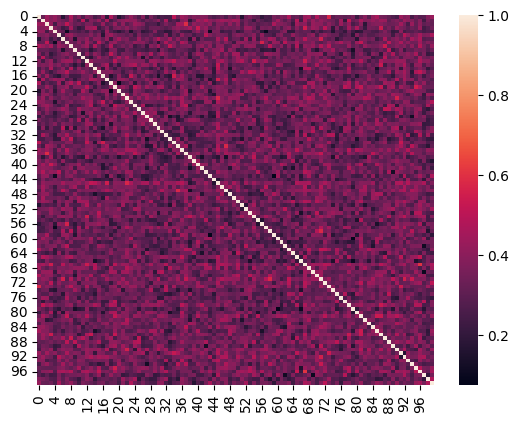

In [17]:
sns.heatmap(customer_similarity[:100, :100])

### Get the most similar

Top 5 similar customers

In [18]:
top5 = top_n(customer_similarity, 5)

top5

array([[8753, 2867, 1926,   73, 8046],
       [ 750, 8592, 1680, 7693, 5288],
       [6997, 9775, 3354,   37,  322],
       ...,
       [3821, 4989, 2506,  166, 8901],
       [1549, 8530, 1256, 2784, 9767],
       [ 512, 5807, 6367, 8978, 6209]], dtype=int64)

Their similarity scores

In [19]:
customer_similarity[0][top5[0]]

array([0.545252  , 0.55790798, 0.56254679, 0.57324453, 0.58654016])

In [20]:
data[top5[0], :]

array([[2., 0., 0., 1., 0., 0., 4., 2., 5., 2., 0., 0., 0., 0., 0., 2.,
        5., 0., 0., 5., 3., 0., 2., 0., 0., 5., 0., 3., 0., 2., 0., 0.,
        2., 0., 0., 0., 0., 0., 1., 3., 5., 0., 3., 4., 0., 0., 0., 0.,
        0., 1., 3., 0., 0., 2., 0., 0., 0., 3., 0., 1., 2., 2., 4., 0.,
        0., 0., 5., 0., 5., 3., 0., 2., 2., 2., 0., 0., 0., 1., 3., 0.,
        2., 3., 0., 0., 0., 0., 4., 3., 0., 0., 5., 0., 0., 0., 0., 0.,
        2., 0., 2., 0.],
       [3., 1., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 1., 5., 1., 0.,
        0., 0., 3., 0., 2., 3., 4., 0., 2., 0., 5., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 4., 5., 0., 0., 0., 1.,
        5., 1., 4., 0., 5., 1., 0., 0., 0., 0., 2., 0., 4., 4., 2., 0.,
        0., 0., 0., 5., 2., 2., 0., 0., 3., 2., 0., 0., 0., 0., 2., 0.,
        0., 2., 2., 5., 3., 0., 4., 0., 0., 2., 4., 3., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 3., 0., 0., 2., 5., 0., 5., 0., 4., 0., 5., 0., 5.,
        0., 0.

We recover the original nan positions of the data, then average the product score of the top 5 customers similar to customer No.0. It will cause the result nan if there is any nan value in the customer's product.

In [21]:
data[mask] = np.nan

data[top5[0], :].mean(axis=0)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       3.6, nan, nan, nan, 4.6, nan, nan, nan, nan, nan, nan, 4. , nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, 3. , 3.6, nan, nan,
       nan, nan, nan, 3.4, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

To avoid the situation, we skip the nan value and then get the average.

In [22]:
np.nanmean(data[top5[0], :], axis=0)

array([3.        , 1.        ,        nan, 2.        , 3.        ,
       1.        , 3.        , 2.66666667, 4.        , 3.5       ,
              nan, 4.        , 1.        , 5.        , 3.        ,
       3.5       , 4.5       ,        nan, 4.33333333, 2.66666667,
       2.33333333, 2.5       , 2.66666667,        nan, 2.        ,
       5.        , 4.        , 2.        , 5.        , 3.5       ,
       1.        , 3.66666667, 1.66666667, 1.        , 2.        ,
       3.        , 1.5       , 5.        , 2.        , 3.6       ,
       2.66666667, 2.        , 2.66666667, 4.6       , 3.        ,
       5.        , 3.5       , 2.33333333, 3.66666667, 1.        ,
       4.        ,        nan, 3.33333333, 2.33333333, 2.        ,
              nan, 2.        , 4.        , 3.        , 1.        ,
       3.75      , 3.        , 3.6       , 2.        , 2.        ,
       2.        , 5.        , 3.        , 3.4       , 2.75      ,
       3.        , 2.75      , 2.        , 3.25      , 2.5    

### Products Recommendation

Now we can recommend the top 5 products for all customers, but they have never bought them before.

In [23]:
# if the original values are nan then 1, else nan
recommendation = np.multiply(np.where(np.isnan(data), 1, np.nan), np.nanmean(data[top5,:], axis=1))

print(recommendation.shape)

recommendation

(10000, 100)


array([[       nan, 1.        ,        nan, ..., 3.        , 2.        ,
               nan],
       [       nan,        nan,        nan, ..., 2.66666667, 2.        ,
               nan],
       [       nan,        nan, 2.        , ...,        nan, 4.        ,
               nan],
       ...,
       [       nan, 3.5       , 1.        , ..., 5.        , 2.66666667,
        3.5       ],
       [1.66666667, 3.        ,        nan, ..., 2.        ,        nan,
        2.        ],
       [       nan, 2.        ,        nan, ..., 2.33333333,        nan,
               nan]])

The recommendation is nan if the customers have ever bought it before because our purpose is to recommend a new product to them.

In [24]:
recommendation[0]

array([       nan, 1.        ,        nan, 2.        , 3.        ,
       1.        ,        nan, 2.66666667,        nan, 3.5       ,
              nan, 4.        , 1.        , 5.        ,        nan,
       3.5       ,        nan,        nan, 4.33333333,        nan,
              nan, 2.5       , 2.66666667,        nan, 2.        ,
       5.        ,        nan, 2.        , 5.        , 3.5       ,
       1.        ,        nan,        nan, 1.        , 2.        ,
              nan, 1.5       , 5.        , 2.        ,        nan,
       2.66666667, 2.        ,        nan,        nan, 3.        ,
              nan,        nan,        nan,        nan, 1.        ,
              nan,        nan,        nan, 2.33333333, 2.        ,
              nan, 2.        , 4.        , 3.        , 1.        ,
              nan,        nan,        nan, 2.        , 2.        ,
       2.        ,        nan,        nan, 3.4       ,        nan,
       3.        ,        nan,        nan,        nan, 2.5    

In [25]:
data[0]

array([ 4., nan,  1., nan, nan, nan,  5., nan,  4., nan, nan, nan, nan,
       nan,  2., nan,  3., nan, nan,  3.,  3., nan, nan,  1., nan, nan,
        4., nan, nan, nan, nan,  5.,  3., nan, nan,  1., nan, nan, nan,
        5., nan, nan,  4.,  5., nan,  3.,  3.,  2.,  4., nan,  4., nan,
        4., nan, nan,  2., nan, nan, nan, nan,  3.,  2.,  3., nan, nan,
       nan,  3.,  1., nan,  3., nan,  2.,  4.,  5., nan, nan, nan, nan,
        1., nan, nan,  2.,  5., nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan,  4., nan, nan, nan, nan,  2.])

In [26]:
top_n(np.nan_to_num(recommendation, 0), 5, exclude=False)

print(top_n(np.nan_to_num(recommendation, 0), 5, exclude=False))
print(f'You can recoomend products {top_n(np.nan_to_num(recommendation, 0), 5, exclude=False)[0][::-1]} for customer No.0.')

[[28 83 13 37 25]
 [ 9 89 38 77 80]
 [98 14  9 62 59]
 ...
 [97 83 73 51 65]
 [20  6 46 71 23]
 [ 4 46 58 63 72]]
You can recoomend products [25 37 13 83 28] for customer No.0.


**There is another method called SVD which can fill out the scores directly.**